# Downloading and plotting soundfiles

Below represents my attempts to download and convert the sound files in the small sample into a spectrogram.

In [115]:
# Standard modules

import numpy as np
import matplotlib.pyplot as plt
import librosa

The best method I've found for downloading data from Huggingface is to run <code>pip install datasets</code> or <code>python -m pip install datasets</code> in the terminal. This gives you a way to access their datasets that does not involve downloading a parquet file or anything else. (Some kind of API?)

In [116]:
# Loading the dataset

from datasets import load_dataset

songs = load_dataset("lewtun/music_genres_small", split='train')
songs

Found cached dataset parquet (C:/Users/blind/.cache/huggingface/datasets/lewtun___parquet/lewtun--music_genres_small-2686d03f87ff3ace/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


Dataset({
    features: ['audio', 'song_id', 'genre_id', 'genre'],
    num_rows: 1000
})

Below is an example of a song. As you can see, each item is a dictionary, and the sampling can be found in <code>['audio']['array']</code>.

In [117]:
songs[0]

{'audio': {'path': None,
  'array': array([ 0.        ,  0.        ,  0.        , ..., -0.00328412,
         -0.00250573, -0.00360047]),
  'sampling_rate': 44100},
 'song_id': 11483,
 'genre_id': 9,
 'genre': 'International'}

In [118]:
first_song_audio = songs[0]['audio']['array']
L = len(first_song_audio)

We conclude with a plot of the audio signal. Note that we normalize the time variable using the sampling rate to plot the signal agaisnt time appropriately.

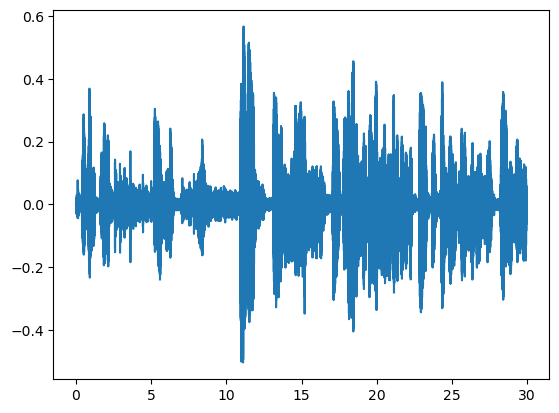

In [262]:
plt.plot(np.arange(L)/44100, first_song_audio)

Below is an example of a spectrogram from the audio signal above. This is a modification of the example found [here](https://huggingface.co/learn/audio-course/chapter1/audio_data). I'm not yet sure if this is correct since experiments earlier with single frequency signals did not yield the right answer. I think I need a better understanding of the <code>librosa.stft</code> function.

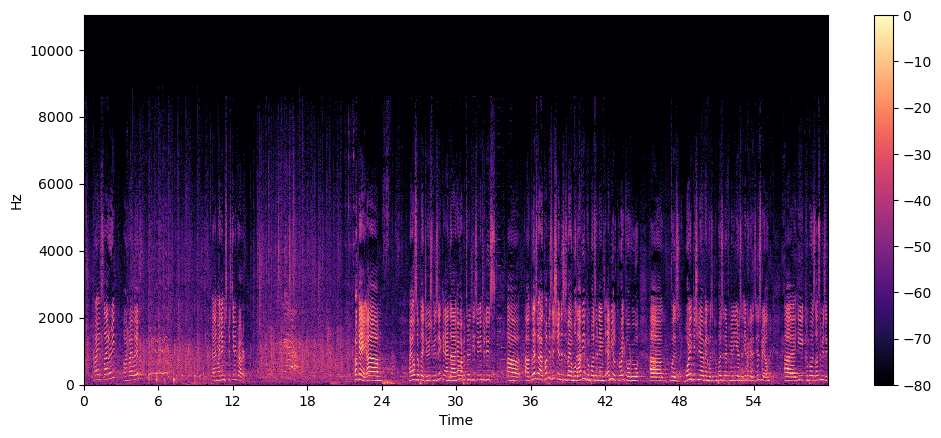

In [261]:
D = librosa.stft(first_song_audio)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()